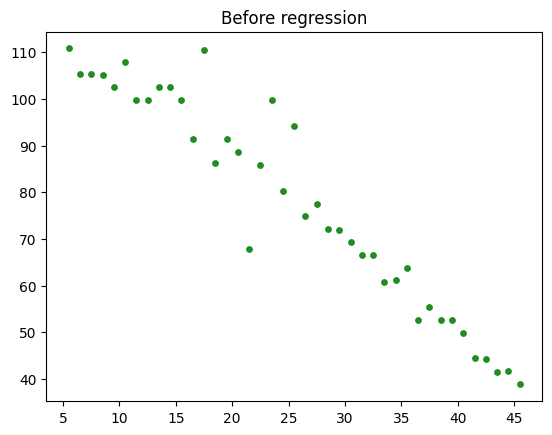

In [2]:
import matplotlib.pyplot as plt

delta_g = [110.8, 105.3, 105.3, 105.2, 102.5, 108.0, 99.8, 99.7, 102.5, 102.5, 99.7, 91.4, 110.4, 86.3, 91.4, 88.7, 67.9, 85.9, 99.7, 80.3, 94.1, 74.8, 77.5, 72.1, 71.9, 69.3, 66.5, 66.5, 60.7, 61.2, 63.7, 52.6, 55.4, 52.6, 52.7, 49.8, 44.4, 44.3, 41.5, 41.6, 38.8]
v = [(i + 0.5) for i in range(5, 46)]

plt.scatter(v, delta_g, color = 'forestgreen', s = 15)
plt.title("Before regression")
plt.show()


In [4]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.12.0


In [24]:
# Convert to numpy arrays and reshape
v = np.array(v).reshape((-1, 1))
delta_g = np.array(delta_g).reshape((-1, 1))

#TensorFlow graph
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1], kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
])

#Loss function and the optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.15,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [25]:
# Train the model
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['mse'])
for epoch in range(3001):
    loss, mse = model.train_on_batch(v, delta_g)
    if epoch % 300 == 0:
        w, b = model.get_weights()
        print('Epoch %d: w = %f, b = %f, loss = %f' % (epoch, w[0][0], b[0], loss))

# Print the final weights and biases
w, b = model.get_weights()
print('w =', w[0][0])
print('b =', b[0])



Epoch 0: w = 0.027739, b = 1.553442, loss = 6791.050293
Epoch 300: w = 1.101497, b = 33.966816, loss = 1498.178711
Epoch 600: w = 0.126990, b = 64.065819, loss = 690.083862
Epoch 900: w = -0.621725, b = 87.216003, loss = 287.158478
Epoch 1200: w = -1.147255, b = 103.470871, loss = 117.918816
Epoch 1500: w = -1.481742, b = 113.818001, loss = 59.069370
Epoch 1800: w = -1.671996, b = 119.703629, loss = 42.573822
Epoch 2100: w = -1.767400, b = 122.655075, loss = 38.940975
Epoch 2400: w = -1.809071, b = 123.944214, loss = 38.327457
Epoch 2700: w = -1.824726, b = 124.428505, loss = 38.250027
Epoch 3000: w = -1.829711, b = 124.582741, loss = 38.242939
w = -1.8297113
b = 124.58274


In [27]:
# Compute the R-squared value
y_pred = model.predict(v)
ss_residual = np.sum((delta_g - y_pred)**2)
ss_total = np.sum((delta_g - np.mean(delta_g))**2)
r_squared = 1 - (ss_residual / ss_total)
print('R-squared:', r_squared)

2/2 [==============================] - 0s 12ms/step
R-squared: 0.9246880777096362
